- create an adding machine
- will add 2 integers (2 inputs) - integer between -10 and 10
- will output the sum (1 output)
- run the model 10 times, report the train/test accuracies to prove stability of the model
- visualise the true and predicted sums (scatter plot

In [48]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# NEW!
import sklearn.metrics as skm

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

##Create the data

In [63]:
dataPoints = 2000
data = torch.randint(-10, 11, (dataPoints, 2)).float()
labels = torch.sum(data, axis=1, keepdim=True)

data,labels

(tensor([[ -4.,  -6.],
         [ -1.,   2.],
         [-10.,  -8.],
         ...,
         [ -3.,  -7.],
         [ -4.,   7.],
         [  4.,   9.]]),
 tensor([[-10.],
         [  1.],
         [-18.],
         ...,
         [-10.],
         [  3.],
         [ 13.]]))

In [50]:
labels.shape

torch.Size([3000, 1])

##Model

In [76]:
def makeModel():
  model = nn.Sequential(
      nn.Linear(2,1),
      nn.Linear(1,1)
  )
  lossfun = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  return model, lossfun, optimizer

In [71]:
def trainModel(epochs, train_data, train_labels):

  model, lossfun, optimizer = makeModel()
  losses = torch.zeros(epochs)
  for epoch in range(epochs):
    batchLoss = []
    for X,y in zip(train_data, train_labels):
      # forward prop
      yHat = model(X)
      loss = lossfun(yHat, y)
      batchLoss.append(loss.item())

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    losses[epoch] = np.mean(batchLoss)


  # final train accuracy
  with torch.no_grad():
    yHat = model(train_data)

  trainAcc = 100*torch.mean((np.abs(yHat - train_labels) <1).float())

  # test accuracy
  dataPoints = 2000
  test_data = torch.randint(-10, 11, (dataPoints, 2)).float()
  test_labels = torch.sum(test_data, axis=1,keepdim=True)

  with torch.no_grad():
    yTest = model(test_data)

  testAcc = 100*torch.mean((np.abs(yTest - test_labels)<1).float())

  return losses, trainAcc, testAcc, model

In [77]:
epochs = 10
losses, trainAcc,testAcc,model = trainModel(epochs, data, labels)
print(f"Train:{trainAcc}% Test:{testAcc}%")
print(losses)

Train:100.0% Test:100.0%
tensor([6.2381e+00, 8.1064e-13, 2.3200e-11, 9.4039e-03, 9.6283e-03, 3.7262e-03,
        8.2826e-03, 6.2163e-03, 5.5455e-03, 7.2225e-03])


In [78]:
for i in range(10):
  losses, trainAcc,testAcc,model = trainModel(epochs, data,labels)
  print(f'Model instance {i+1}, final TRAIN/TEST accuracies: {trainAcc}%, {testAcc}%')

Model instance 1, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 2, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 3, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 4, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 5, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 6, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 7, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 8, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 9, final TRAIN/TEST accuracies: 100.0%, 100.0%
Model instance 10, final TRAIN/TEST accuracies: 96.80000305175781%, 96.55000305175781%


##Plot Results

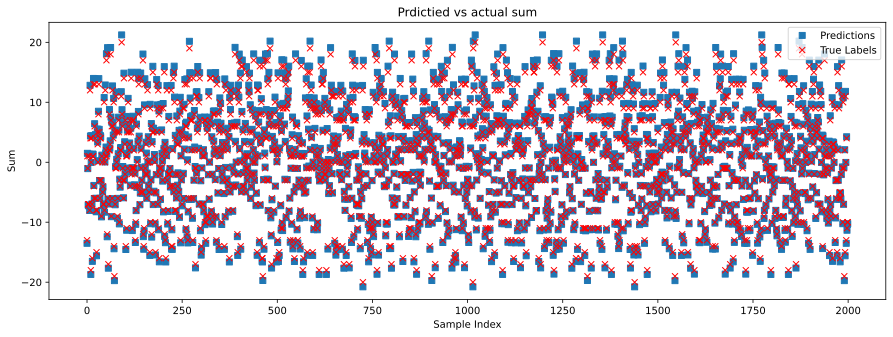

In [79]:
test_data = torch.randint(-10, 11, (dataPoints, 2)).float()
test_labels = torch.sum(test_data, axis=1,keepdim=True)

with torch.no_grad():
  yHat = model(test_data)

fig= plt.figure(figsize=(15,5))
plt.plot(yHat, 's')
plt.plot(np.round(test_labels.detach()), 'rx')
plt.title("Prdictied vs actual sum")
plt.xlabel("Sample Index")
plt.ylabel("Sum")
plt.legend(["Predictions", "True Labels"])
plt.show()